In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate
from itertools import groupby

In [319]:
datos=pd.read_csv('Label.csv') # en "datos" queda la tabla sin filtrar
datos3=datos # "datos3 es la que vamos a modificar"
datos.head()

,Curve Info,min,XAtYMin,XAtYVal(-10),XAtYVal_1(-10.08),XWidthAtYVal(-10.08)
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.7me...,-16.2672,79.0,70.3603,70.4451,20.9217
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.75m...,-15.7762,75.0,68.2429,68.3188,16.9542
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.8me...,-12.4503,68.0,64.5428,64.6169,7.8397
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.85m...,-28.3973,66.0,60.1020,60.1495,14.3766
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.9me...,-25.3221,64.0,57.8866,57.9414,14.7366


In [320]:
datos3['idx']=np.arange(len(datos3)) # pongo índice para identificarlos con las columnas de S11.csv

In [321]:
# ponemos un filtro para que únicamente los XWidthAtYVal con valor numérico aparezcan
filt=[]
for i in range(len(datos3)):
    try:
        float(datos3.iloc[i,5])
        filt+=[True]
    except: # si float() da error, es porque es NaN o no aparece, entonces lo ponemos como falso
        filt+=[False] 

In [322]:
datos3=datos3[filt] # aplicamos el filtro anterior

In [323]:
datos3=datos3[datos3.iloc[:,1]<-10] # dejamos unicamente los que bajen de -10 dB

In [324]:
# este filtro deja únicamente los que tengan ancho > 15 MHz (casi +/- 8 MHz)
filw=[float(datos3.iloc[i,5])>15 for i in range(len(datos3))] 

In [325]:
datos3=datos3[filw] # aplicamos el filtro anterior

In [326]:
datos3 # de los 50 iniciales sólo quedan 7 que cumplen las condiciones (aun sin mirar la frecuencia central)

,Curve Info,min,XAtYMin,XAtYVal(-10),XAtYVal_1(-10.08),XWidthAtYVal(-10.08),idx
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.7me...,-16.2672,79.0,70.3603,70.4451,20.9217,0
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.75m...,-15.7762,75.0,68.2429,68.3188,16.9542,1
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.9me...,-34.9256,65.0,59.2061,59.2557,15.1139,9
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.8me...,-19.8435,70.0,63.5119,63.5758,17.1405,17
dB(S(1,1)) Setup1 : Sweep Height='0.85meter' L='0.9me...,-44.1843,65.0,58.8541,58.9108,15.6989,19
dB(S(1,1)) Setup1 : Sweep Height='0.95meter' L='0.85m...,-18.1664,67.0,61.0360,61.0927,15.0725,28
dB(S(1,1)) Setup1 : Sweep Height='0.95meter' L='0.8me...,-15.9636,69.0,62.3471,62.4177,15.8952,47


In [327]:
s11=pd.read_csv('S11.csv')

In [328]:
s11.head()

,Freq [MHz],"dB(S(1,1)) [] - Height='0.85meter' L='0.7meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.75meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.8meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.85meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.9meter' W='0.8meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.7meter' W='0.85meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.75meter' W='0.85meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.8meter' W='0.85meter'","dB(S(1,1)) [] - Height='0.85meter' L='0.85meter' W='0.85meter'",...,"dB(S(1,1)) [] - Height='0.95meter' L='0.7meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.75meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.8meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.85meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.9meter' W='0.95meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.7meter' W='1meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.75meter' W='1meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.8meter' W='1meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.85meter' W='1meter'","dB(S(1,1)) [] - Height='0.95meter' L='0.9meter' W='1meter'"
0,40,-0.220919,-0.244311,-0.295277,-0.459987,-0.612263,-0.192976,-0.249867,-0.376002,-0.398908,...,-0.274362,-0.302862,-0.377228,-0.547158,-0.665485,-0.300634,-0.356517,-0.495958,-0.508282,-0.781715
1,41,-0.252640,-0.279684,-0.338446,-0.533058,-0.713292,-0.218632,-0.284554,-0.432787,-0.460232,...,-0.311292,-0.345713,-0.432013,-0.630277,-0.770234,-0.342036,-0.406576,-0.572342,-0.584993,-0.906446
2,42,-0.289036,-0.320374,-0.388303,-0.618312,-0.831876,-0.247878,-0.324409,-0.498535,-0.531905,...,-0.353470,-0.394592,-0.495141,-0.726874,-0.892759,-0.389190,-0.464014,-0.659166,-0.674352,-1.052544
3,43,-0.330806,-0.367211,-0.446027,-0.717902,-0.971186,-0.281263,-0.370283,-0.574737,-0.615860,...,-0.401781,-0.450541,-0.568160,-0.839247,-1.036262,-0.443006,-0.530047,-0.758175,-0.778649,-1.223882
4,44,-0.378747,-0.421152,-0.513012,-0.834371,-1.134943,-0.319415,-0.423170,-0.663132,-0.714415,...,-0.457235,-0.514754,-0.652885,-0.970058,-1.204509,-0.504517,-0.606070,-0.871412,-0.900599,-1.425023


In [334]:
# esto lee de la malla de frecuencias el delta f (en este caso es 1 MHz)
fs=np.array(s11['Freq [MHz]'])
delfs=np.unique((fs[1:]-fs[:-1]))
if len(delfs)==1:
    delf=delfs[0]
else:
    print("Malla de frecuencia no es uniforme")

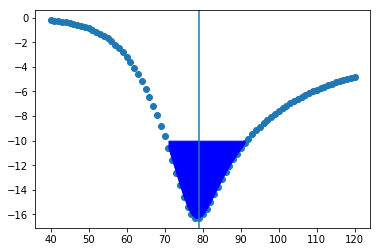

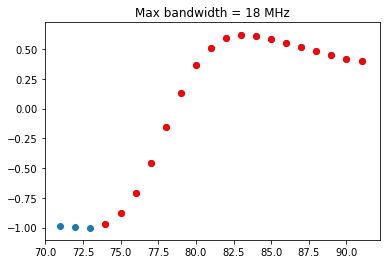

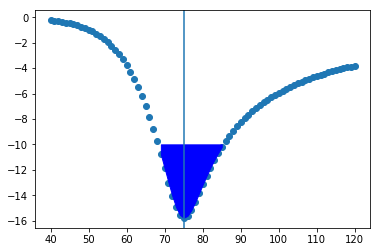

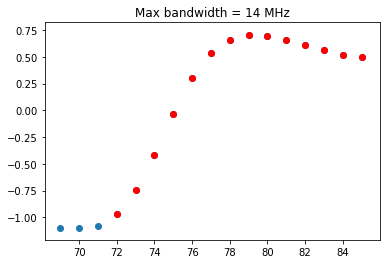

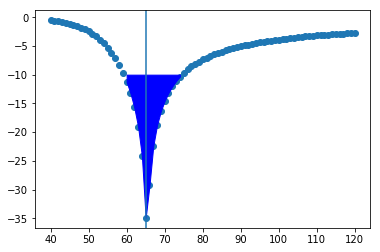

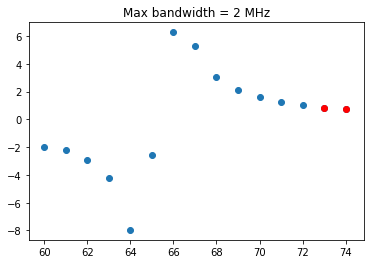

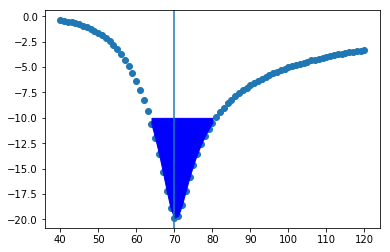

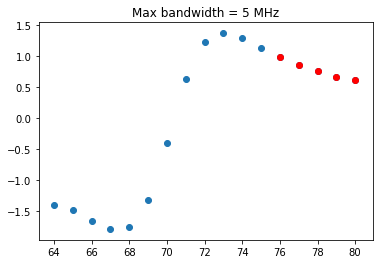

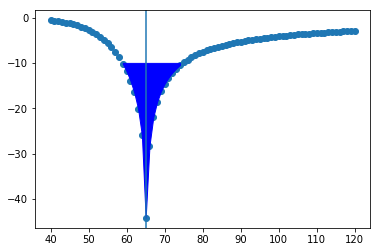

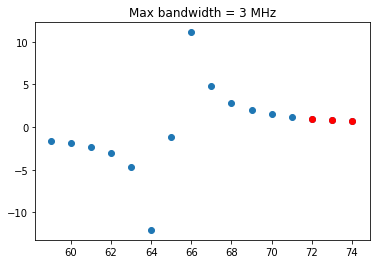

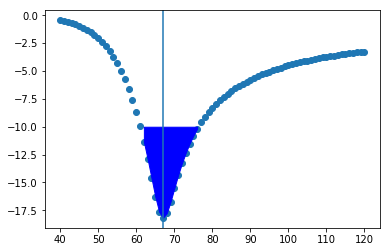

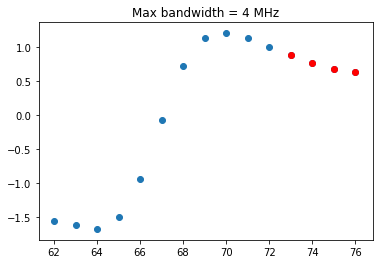

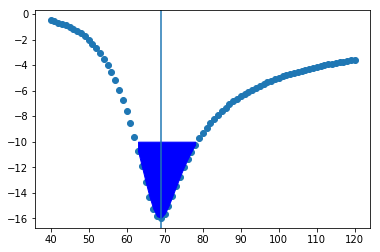

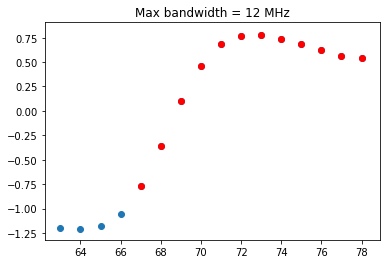

In [316]:
for ix in datos3['idx']: # para las antenas que sobrevivieron el primer filtro (0,1,9,...)
    fs=np.array(s11.iloc[:,0]) # malla de frecuencias, hay que hacerlo cada vez por lo que se aplican filtros
    ste=np.array(s11.iloc[:,ix+1]) # malla de S11 correspondiente
    plt.scatter(fs,ste) # plot de puntos
    plt.fill_between(fs,-10*np.ones(len(fs)),ste, where = (ste<=-10) , color='b') # plot que sombrea la región de interés
    plt.axvline(datos.iloc[ix,2]) # línea que muestra en mínimo en frecuencia
    plt.show()
    fil10=ste<=-10 # filtro para dejar únicamente la parte del s11 que está por debajo de -10 dB (dentro del ancho)
    fs=fs[fil10] # aplicar filtro a frecuencias
    ste=ste[fil10] # aplicar filtro a s11
    plt.scatter(fs,np.gradient(ste,fs)) # derivada de s11
# Esta parte del código identifica el intervalo de frecuencias más grande en el que la derivada es suave:    
    checklist=np.abs(np.gradient(ste,fs))<1 # deja los puntos en los que la tasa de cambio es menor a 1 dB/MHz
    suave=[] 
    store=[]
    for group in groupby(range(len(checklist)),lambda x: checklist[x]):
        if group[0]:
            dummy=list(group[1])
            suave+=[delf*len(dummy)]
            store+=[dummy]
    lsuave=np.max(suave) # Aquí está el ancho de banda de ese intervalo
    pos=store[np.argmax(suave)] # En este arreglo se identifican los valores de frecuencia y s11 de ese intervalo
    plt.scatter(fs[pos],np.gradient(ste,fs)[pos],c='r') # se plotean en rojo los puntos en el intervalo
    plt.title('Max bandwidth = '+str(lsuave)+' MHz') # en el título del plot se muestra el ancho de banda del intervalo
    plt.show()



In [13]:
#leyendo los archivos para label 
w0=datos3.iloc[:,0]
w1=datos3.iloc[:,1]
w2=datos3.iloc[:,2]
w3=datos3.iloc[:,3]

w0=np.array(w0)
w1=np.array(w1)
w2=np.array(w2)
w3=np.array(w3)


In [15]:
BWS11amenos10dB=np.array(w3.min())
BWS11amax10dB=np.array(w3.max())

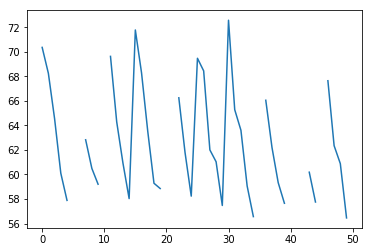

In [18]:
plt.plot(w3)

In [5]:
print BWS11amenos10dB,BWS11amax10dB

1.4196 17.6385


In [37]:
#frecuencia central
S11_ancho=float(w2)+(float(w3)/2)
S11_ancho=np.array(S11_ancho)
zS11=np.arange(0,len(w3),1)

TypeError: only length-1 arrays can be converted to Python scalars

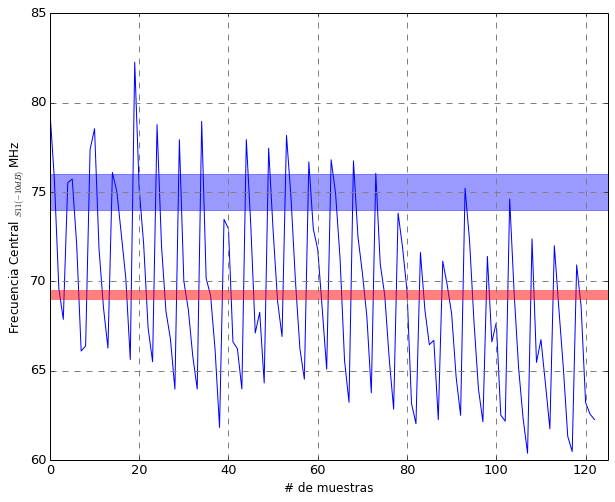

In [7]:
plt.figure(figsize=(10,8))
plt.plot(zS11,S11_ancho,label='1')
# Banda vertical de color 
# y 30% de transparencia
plt.axhspan(74, 76, alpha=0.4, color='b')
plt.axhline(np.average(S11_ancho), color='r',xmin=0, xmax=123,alpha=0.5,linewidth = 10)
#plt.legend(loc = 4,prop={'size': 20})
plt.ylabel(r'Frecuencia Central $_{S11(-10 dB)}$ MHz',fontsize=12)
plt.xlabel('# de muestras',fontsize=12)
plt.xlim(0,125)
#plt.title('Figura de Merito')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.show
plt.savefig('BWS11')

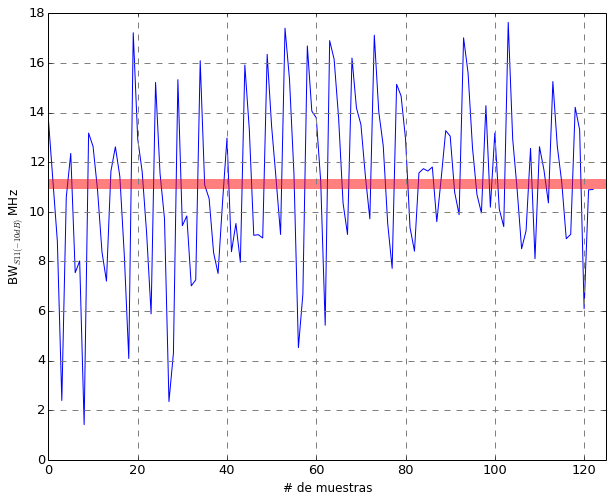

In [8]:
plt.figure(figsize=(10,8))
plt.plot(zS11,w3,label='1')
# Banda vertical de color 
# y 30% de transparencia
#plt.axhspan(10, 12, alpha=0.4, color='b')
plt.axhline(np.average(w3), color='r',xmin=0, xmax=123,alpha=0.5,linewidth = 10)
#plt.legend(loc = 4,prop={'size': 20})
plt.ylabel(r'BW$_{S11 (-10 dB)}$ MHz',fontsize=12)
plt.xlabel('# de muestras',fontsize=12)
plt.xlim(0,125)
#plt.title('Figura de Merito')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.show
plt.savefig('BWPromedio')

In [9]:
promedioBW=np.average(w3)
print promedioBW

11.1290398374


In [10]:
resultado1=[]
resultado2=[]
resultado3=[]
for i in w3:
    su=0.6*((i-20)/20)**2
    resultado1.append(su) 
for j in S11_ancho:
    su=0.4*((j-75)/75)**2
    resultado2.append(su)
#for k in w4:
#    su=(sigmamedia_0/(k))
#    resultado30.append(su)
resultado1=np.array(resultado1)
resultado2=np.array(resultado2)
#resultado30=np.array(resultado30)
Figura_Merito_Final=np.array(resultado1+resultado2)
print Figura_Merito_Final
print 

[ 0.06068516  0.11460707  0.18995647  0.46869219  0.13268073  0.0877199
  0.23330349  0.22102523  0.52313346  0.07029174  0.0822422   0.12540859
  0.20558534  0.25098921  0.10500735  0.08168996  0.11078655  0.20908307
  0.38624974  0.01535066  0.07471236  0.10607132  0.18127514  0.30527789
  0.03531614  0.10781473  0.16156015  0.47217158  0.37858279  0.03335492
  0.16905937  0.15816955  0.25899179  0.25226332  0.02401098  0.12100385
  0.13686464  0.20910569  0.2462383   0.13885136  0.07433858  0.2072026
  0.16994856  0.2259424   0.02561424  0.06723257  0.18426181  0.18216582
  0.19141891  0.02042363  0.06479557  0.1158827   0.18335982  0.01082702
  0.03248999  0.1090885   0.36487706  0.27388053  0.01664747  0.05319494
  0.05858566  0.11903446  0.32565693  0.01461739  0.02224955  0.05869244
  0.14589432  0.18856207  0.02186177  0.05108548  0.06445164  0.11320713
  0.16763369  0.01248761  0.0545706   0.08302573  0.17053927  0.23679053
  0.03550108  0.04328463  0.07710015  0.17946186  0.2

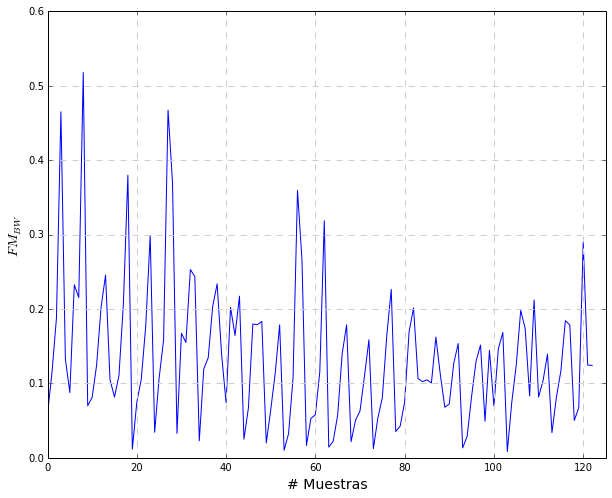

In [11]:
plt.figure(figsize=(10,8))
plt.plot(zS11,resultado1)
plt.ylabel(r'$FM_{BW}$',fontsize=14)
plt.xlabel('# Muestras',fontsize=14)
plt.xlim(0,125)
#plt.title(r'Figura merito BW$_{-10 dB}$')
plt.tick_params(axis='both', which='', labelsize=14)
plt.grid(True)
plt.grid(color = '0.8', linestyle = '--', linewidth = 1)
plt.show
plt.savefig('Nueva figura de merito BW')

In [12]:
minimoFMBW=np.min(resultado1)
print minimoFMBW

0.008365023375


In [13]:
minimoFMFN=np.min(Figura_Merito_Final)
print minimoFMFN

0.0083762339494


In [14]:
Seleccion_minimo_FMFN=np.where(Figura_Merito_Final<=0.015)
print Seleccion_minimo_FMFN

FCfinal=[]
BWfinal=[]
Confifinal=[]
muestrafinal=[]
for i in Seleccion_minimo_FMFN:
    filtro=S11_ancho[i]
    FCfinal.append(filtro)
    print filtro
for i in Seleccion_minimo_FMFN:
    filtro=w3[i]
    BWfinal.append(filtro)
    print filtro
for i in Seleccion_minimo_FMFN:
    filtro=w0[i]
    Confifinal.append(filtro)
    print filtro
for i in Seleccion_minimo_FMFN:
    filtro=Figura_Merito_Final[i]
    muestrafinal.append(filtro)
    print filtro

(array([ 53,  63,  73,  93, 103]),)
[ 78.1711   76.80315  76.04705  75.20775  74.60295]
[ 17.4036  16.9031  17.1237  17.0161  17.6385]
["1)) Setup1 : Sweep Height='0.6meter' L='0.8meter' W='0.85meter'"
 "1)) Setup1 : Sweep Height='0.6meter' L='0.8meter' W='0.95meter'"
 "1)) Setup1 : Sweep Height='0.65meter' L='0.8meter' W='0.8meter'"
 "1)) Setup1 : Sweep Height='0.65meter' L='0.8meter' W='1meter'"
 "1)) Setup1 : Sweep Height='0.7meter' L='0.8meter' W='0.85meter'"]
[ 0.01082702  0.01461739  0.01248761  0.01335856  0.00837623]
